# Analyze transcript field to find most common messey chars
### Code written w/ claude before motified

In [27]:
# Messy Character Tracker for Excel Files
# This notebook analyzes the 'Transcript' field to identify sequences of messy characters

import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
from utils.constants import Paths
from utils.ocr_cleaning import OCR_Check, OCR_Clean

In [28]:
# Load excel file (modified metadata from 00 notebook)

file_path = Paths.mccray_modified_metadata
df = pd.read_excel(file_path)

print(f"Loaded {len(df)} rows")
print(f"Columns: {list(df.columns)}")

# Check if Transcript column exists
transcript_col = 'Transcript'
if transcript_col not in df.columns:
    print(f"Column '{transcript_col}' not found. Available columns: {list(df.columns)}")

Loaded 19329 rows
Columns: ['Title', 'Creator', 'Contributors', 'Date', 'Approximate Date', 'Source', 'Subject', 'Local Subject', 'S.C. County', 'Description', 'Extent', 'Digital Collection', 'Website', 'Contributing Institution', 'Rights', 'Time Period', 'Geographic Location', 'Language', 'Digitization Specifications', 'Date Digital', 'Type', 'Format', 'Media Type', 'Identifier', 'Note', 'Digital Assistant', 'Transcript', 'OCLC number', 'Date created', 'Date modified', 'Reference URL', 'CONTENTdm number', 'CONTENTdm file name', 'CONTENTdm file path', 'Year', 'messy_sequences', 'messy_count', 'has_messy', 'total_messy_chars', 'special_messy_sequences', 'special_messy_count', 'has_special_messy', 'total_special_messy_chars', 'repeat_sequences', 'repeat_sequence_count', 'has_repeat_sequence']


In [ ]:
# Helper: Find sequences using regex pattern
def find_sequences(pattern, text, exceptions=None):
    if exceptions is None:
        exceptions = [
            "example-expection=this"
        ]
    candidates = re.findall(pattern, str(text))
    flagged = []
    for candidate in candidates:
        if not any(re.match(exc, candidate) for exc in exceptions):
            flagged.append(candidate)
    return flagged

# General messy character analysis
df['messy_sequences'] = df[transcript_col].apply(lambda x: find_sequences(OCR_Clean.general_pattern, x, OCR_Clean.general_exceptions))
df['messy_count'] = df['messy_sequences'].apply(len)
df['has_messy'] = df['messy_count'] > 0
df['total_messy_chars'] = df['messy_sequences'].apply(lambda x: sum(len(seq) for seq in x))

# Special messy character analysis
df['special_messy_sequences'] = df[transcript_col].apply(lambda x: find_sequences(OCR_Clean.special_pattern, x))
df['special_messy_count'] = df['special_messy_sequences'].apply(len)
df['has_special_messy'] = df['special_messy_count'] > 0
df['total_special_messy_chars'] = df['special_messy_sequences'].apply(lambda x: sum(len(seq) for seq in x))

# Repeated letter analysis
df['repeat_sequences'] = df[transcript_col].apply(lambda x: find_sequences(OCR_Clean.letter_pattern, x))
df['repeat_sequence_count'] = df['repeat_sequences'].apply(len)
df['has_repeat_sequence'] = df['repeat_sequence_count'] > 0


In [ ]:
# Condense prev: 
# # sequences
# df['messy_sequences'] = df['repeat_sequences'].apply(len)
# # count
# df['messy_seq_count'] = df['repeat_sequences'].apply(len) + df['repeat_sequences'].apply(len)
# Any messy
df['any_messy'] = df[['has_messy', 'has_special_messy', 'has_repeat_sequence']].any(axis=1)


In [30]:
# --- Summary Stats ---
total_rows = len(df)
print(f"\nSummary (General):")
print(f"Total rows: {total_rows}")
print(f"Rows with messy chars: {df['has_messy'].sum()} ({df['has_messy'].mean()*100:.1f}%)")
print(f"Total messy sequences: {df['messy_count'].sum()}")

print(f"\nSummary (Special):")
print(f"Rows with special messy chars: {df['has_special_messy'].sum()} ({df['has_special_messy'].mean()*100:.1f}%)")
print(f"Total special messy sequences: {df['special_messy_count'].sum()}")

print(f"\nSummary (Repeated Letters):")
print(f"Rows with repeats: {df['has_repeat_sequence'].sum()} ({df['has_repeat_sequence'].mean()*100:.1f}%)")

# --- Most Common Messy Sequences ---
def print_top_sequences(column, title, top_n=50):
    all_sequences = []
    for sequences in df[column]:
        all_sequences.extend(sequences)
    if all_sequences:
        sequence_counts = Counter(all_sequences)
        print(f"\nTop {top_n} {title}:")
        for seq, count in sequence_counts.most_common(top_n):
            print(f"  {repr(seq)}: {count} times")
    else:
        print(f"\nNo {title.lower()} found.")

print_top_sequences('messy_sequences', 'general messy sequences')
print_top_sequences('special_messy_sequences', 'special messy sequences')
print_top_sequences('repeat_sequences', 'repeat chars')


Summary (General):
Total rows: 19329
Rows with messy chars: 5041 (26.1%)
Total messy sequences: 18911

Summary (Special):
Rows with special messy chars: 10977 (56.8%)
Total special messy sequences: 148316

Summary (Repeated Letters):
Rows with repeats: 1189 (6.2%)

Top 50 general messy sequences:
  'gt;&gt': 438 times
  'lt;L&gt': 145 times
  '4&gt': 131 times
  '4-&gt': 130 times
  'gt;&lt': 99 times
  '½&gt': 91 times
  'lt;&lt': 83 times
  'ΓÇö&lt': 72 times
  'Γûá&gt': 67 times
  'ΓÇó&gt': 66 times
  'ú&gt': 66 times
  'lt;-&gt': 61 times
  '19^8': 47 times
  'ΓÇÖ&gt': 44 times
  '3&gt': 41 times
  'Γûá&lt': 35 times
  'lt;z&gt': 32 times
  'r-&lt': 32 times
  '0&gt': 31 times
  'ΓÇó&lt': 30 times
  '½&lt': 30 times
  '1&gt': 27 times
  'lt;&gt': 27 times
  'ú&lt': 26 times
  '19^6': 23 times
  'lt;/&gt': 22 times
  'Γû║&gt': 22 times
  'lt;l&gt': 22 times
  '4_&gt': 22 times
  'ΓÇó-&lt': 21 times
  '_&gt': 21 times
  'lt;x&gt': 20 times
  'c^act': 19 times
  'ΓÇö&gt': 17 times
  

In [31]:
# --- Example Messy Rows ---
def print_example_rows(flag_col, seq_col, n=5, label="examples"):
    messy_df = df[df[flag_col]].head(n)
    print(f"\nFirst {n} {label}:")
    print("======================")
    for idx, row in messy_df.iterrows():
        print(f"Row {idx}: {len(row[seq_col])} sequences")
        print(f"  Sequences: {row[seq_col]}")
        print(f"  Text preview: {str(row[transcript_col])[:100]}...\n")

print_example_rows('has_messy', 'messy_sequences', 10, "messy examples")
print_example_rows('has_special_messy', 'special_messy_sequences', 5, "special messy examples")


First 10 messy examples:
Row 46: 1 sequences
  Sequences: ['didn*t']
  Text preview: January 14, 1961  To: Mr. Franklin H. Whittaker  From: John H. McCray  Dear Mr. Whittaker:  I did no...

Row 142: 1 sequences
  Sequences: ['lt;&gt;2,~89']
  Text preview: 6a.  THE PITTSBURGH "COURIER'  Sept. 9, 1961  Atlanta Negro  Vote to Elect  The Next Mayor  By TREZZ...

Row 150: 1 sequences
  Sequences: ['Dyne*)ΓÇöthe']
  Text preview: Sec. 2  THE COURIER  Sept. 9, 1961  TOP TALENTΓÇöThese youngsters, appearing in  the annual Talent D...

Row 153: 1 sequences
  Sequences: ['Γûá*Γûá']
  Text preview: Horizon  By P. L. Prattis  Mr. Prattis  Clarence  CLARENCE must have had a  complex. There is a time...

Row 155: 1 sequences
  Sequences: ['Y-&gt']
  Text preview: TIME MOVES far too swifty these days. As one  moves on, and the months become years, tha  hours spee...

Row 165: 8 sequences
  Sequences: ['1929ΓÇö$10,000.00', '1919ΓÇö$9,000.00', '1946ΓÇö$5,000.00', '1947ΓÇö$4,300.00', '1941ΓÇö$3,500,00

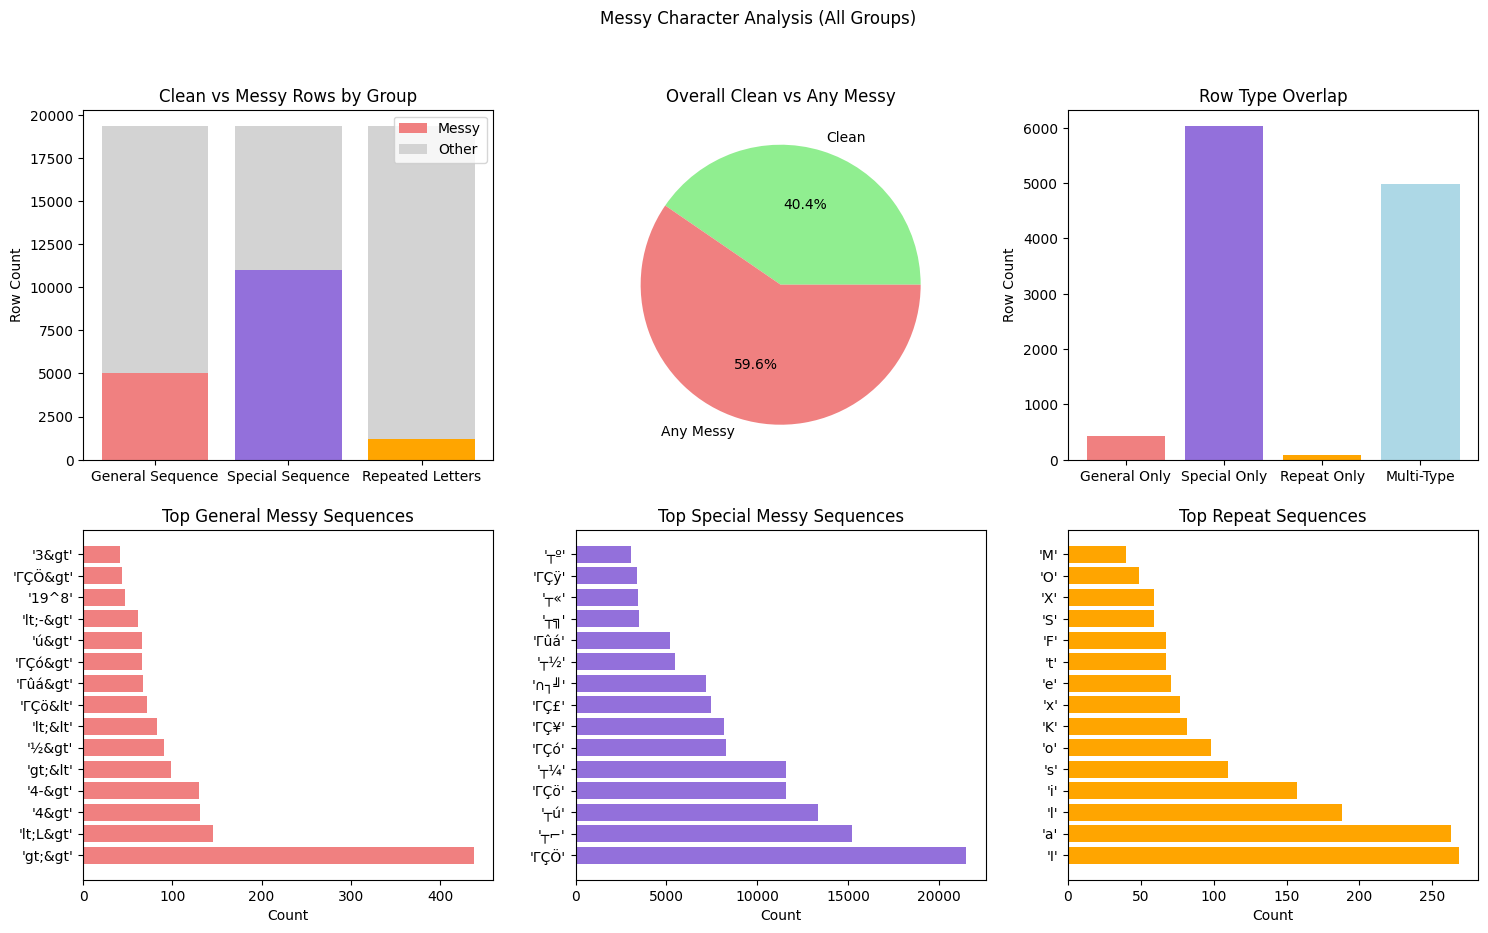

In [32]:
import numpy as np

# Clean vs messy for each group
group_labels = ['General Sequence', 'Special Sequence', 'Repeated Letters']
clean_counts = [
    (~df['has_messy']).sum(),
    (~df['has_special_messy']).sum(),
    (~df['has_repeat_sequence']).sum()
]
messy_counts = [
    df['has_messy'].sum(),
    df['has_special_messy'].sum(),
    df['has_repeat_sequence'].sum()
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Messy Character Analysis (All Groups)')

# Bar chart: clean vs messy for each group
axes[0,0].bar(group_labels, messy_counts, label='Messy', color=['lightcoral', 'mediumpurple', 'orange'])
axes[0,0].bar(group_labels, clean_counts, bottom=messy_counts, label='Other', color='lightgray')
axes[0,0].set_title('Clean vs Messy Rows by Group')
axes[0,0].set_ylabel('Row Count')
axes[0,0].legend()

# Pie chart: overall clean vs any messy
any_messy = df['any_messy'].sum()
all_rows = len(df)
axes[0,1].pie([all_rows-any_messy, any_messy], labels=['Clean', 'Any Messy'],
              autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[0,1].set_title('Overall Clean vs Any Messy')

# Stacked bar: overlap between groups
overlap_counts = [
    (df['has_messy'] & ~df['has_special_messy'] & ~df['has_repeat_sequence']).sum(),
    (~df['has_messy'] & df['has_special_messy'] & ~df['has_repeat_sequence']).sum(),
    (~df['has_messy'] & ~df['has_special_messy'] & df['has_repeat_sequence']).sum(),
    (df[['has_messy', 'has_special_messy', 'has_repeat_sequence']].sum(axis=1) > 1).sum()
]
axes[0,2].bar(['General Only', 'Special Only', 'Repeat Only', 'Multi-Type'], overlap_counts,
              color=['lightcoral', 'mediumpurple', 'orange', 'lightblue'])
axes[0,2].set_title('Row Type Overlap')
axes[0,2].set_ylabel('Row Count')

# Bar graphs for messy sequence counts
def plot_top_sequences(ax, df, column, color, title, xlabel='Count', top_n=15):
    all_sequences = []
    for sequences in df[column]:
        all_sequences.extend(sequences)
    if all_sequences:
        sequence_counts = Counter(all_sequences)
        top_items = sequence_counts.most_common(top_n)
        seqs, counts = zip(*top_items)
        seqs = [repr(s)[:15] for s in seqs]
        ax.barh(range(len(seqs)), counts, color=color)
        ax.set_yticks(range(len(seqs)))
        ax.set_yticklabels(seqs)
        ax.set_xlabel(xlabel)
        ax.set_title(title)
    else:
        ax.set_title(f'No {title}')

plot_top_sequences(
    axes[1,0], df, 'messy_sequences', 'lightcoral', 'Top General Messy Sequences'
)
plot_top_sequences(
    axes[1,1], df, 'special_messy_sequences', 'mediumpurple', 'Top Special Messy Sequences'
)
plot_top_sequences(
    axes[1,2], df, 'repeat_sequences', 'orange', 'Top Repeat Sequences'
)

In [33]:
# --- Save Results ---
output_file = file_path
with pd.ExcelWriter(output_file) as writer:
    df.to_excel(writer, sheet_name='Metadata', index=False)
    summary = pd.DataFrame({
        'Metric': ['Total Rows', 'Messy Rows', 'Clean Rows', 'Percent Messy'],
        'Value': [total_rows, df['has_messy'].sum(), total_rows-df['has_messy'].sum(), f"{df['has_messy'].mean()*100:.1f}%"]
    })
    summary.to_excel(writer, sheet_name='Summary', index=False)

print(f"Results saved to {output_file}")
print(f"\nFinal dataframe shape: {df.shape}")

Results saved to ../../data/mccray/changed_data/McCray+.xlsx

Final dataframe shape: (19329, 47)
New fields added: messy_sequences, messy_count, has_messy, total_messy_chars
